# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

np.random.seed(42)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# # Print the city count to confirm sufficient count
len(cities)


597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url for calls to openweathermap
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

#initialize needed lists
city_name = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_spd = []
country = []
date = []
counter = 1

print("""
Beginning Data Retrieval     
-----------------------------
""")
#loop through cities in cities list and append needed data to corresponding lists
for city in cities:
    try:
        response = requests.get(base_url+city+"&appid="+weather_api_key+"&units=imperial").json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_spd.append(response["wind"]["speed"])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #print log of each city as it is processed
        print(f"Processing Record {counter} of {len(cities)} | {city}")
        counter = counter + 1
        
    #if city is not found, skip it 
    except KeyError:
        print(f"{city} not found. Skipping...")
        pass 

print("""
-----------------------------
Data Retrieval Complete      
-----------------------------
""")



Beginning Data Retrieval     
-----------------------------

Processing Record 1 of 597 | henties bay
illoqqortoormiut not found. Skipping...
Processing Record 2 of 597 | bethel
Processing Record 3 of 597 | saint-francois
Processing Record 4 of 597 | ushuaia
Processing Record 5 of 597 | mar del plata
Processing Record 6 of 597 | kruisfontein
Processing Record 7 of 597 | bronnoysund
tawkar not found. Skipping...
Processing Record 8 of 597 | yumen
Processing Record 9 of 597 | albany
Processing Record 10 of 597 | dikson
Processing Record 11 of 597 | ossora
Processing Record 12 of 597 | vaini
Processing Record 13 of 597 | castro
taolanaro not found. Skipping...
Processing Record 14 of 597 | vanimo
Processing Record 15 of 597 | san cristobal
Processing Record 16 of 597 | ulladulla
Processing Record 17 of 597 | ewa beach
Processing Record 18 of 597 | bluff
Processing Record 19 of 597 | maldonado
Processing Record 20 of 597 | mataura
Processing Record 21 of 597 | jamestown
Processing Record 

Processing Record 191 of 597 | kokopo
Processing Record 192 of 597 | carutapera
Processing Record 193 of 597 | georgetown
Processing Record 194 of 597 | cidreira
Processing Record 195 of 597 | pemba
Processing Record 196 of 597 | poum
Processing Record 197 of 597 | paraiso
Processing Record 198 of 597 | mount isa
Processing Record 199 of 597 | abu dhabi
Processing Record 200 of 597 | valle del guamuez
Processing Record 201 of 597 | mirnyy
Processing Record 202 of 597 | houma
thilogne not found. Skipping...
Processing Record 203 of 597 | kattivakkam
palabuhanratu not found. Skipping...
Processing Record 204 of 597 | sharjah
Processing Record 205 of 597 | moundou
Processing Record 206 of 597 | komsomolskiy
Processing Record 207 of 597 | huilong
Processing Record 208 of 597 | saldanha
Processing Record 209 of 597 | suoyarvi
Processing Record 210 of 597 | chapais
Processing Record 211 of 597 | plettenberg bay
Processing Record 212 of 597 | tottori
Processing Record 213 of 597 | abu samrah


Processing Record 380 of 597 | maragogi
Processing Record 381 of 597 | nantucket
Processing Record 382 of 597 | yibin
Processing Record 383 of 597 | kaseda
Processing Record 384 of 597 | sept-iles
Processing Record 385 of 597 | hay river
Processing Record 386 of 597 | grindavik
Processing Record 387 of 597 | shimoda
Processing Record 388 of 597 | rincon
Processing Record 389 of 597 | qaqortoq
Processing Record 390 of 597 | veraval
satitoa not found. Skipping...
Processing Record 391 of 597 | beterou
Processing Record 392 of 597 | lata
Processing Record 393 of 597 | talnakh
Processing Record 394 of 597 | chincha alta
Processing Record 395 of 597 | portland
Processing Record 396 of 597 | suntar
Processing Record 397 of 597 | toro
fianga not found. Skipping...
Processing Record 398 of 597 | lakhimpur
Processing Record 399 of 597 | khani
Processing Record 400 of 597 | george town
Processing Record 401 of 597 | kabwe
Processing Record 402 of 597 | goderich
Processing Record 403 of 597 | air

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#ensure all lists are the same length

print(len(city_name))
print(len(lat))
print(len(lng))
print(len(temp_max))
print(len(humidity))
print(len(clouds))
print(len(wind_spd))
print(len(country))
print(len(date))


544
544
544
544
544
544
544
544
544


In [5]:
#put all lists into a dataframe
city_data = pd.DataFrame({
    'City':city_name,
    'Latitude': lat,
    'Longitude':lng,
    'Max_Temp': temp_max,
    'Humidity': humidity,
    'Cloudiness':clouds,
    'Wind_Speed':wind_spd,
    'Country': country,
    'Date': date
})
city_data.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Henties Bay,-22.12,14.28,67.66,26,0,10.09,NA,1593482903
1,Bethel,41.37,-73.41,68.00,82,1,4.18,US,1593482644
2,Saint-François,46.42,3.91,53.01,87,7,2.24,FR,1593482903
3,Ushuaia,-54.80,-68.30,33.80,64,75,10.29,AR,1593482904
4,Mar del Plata,-38.00,-57.56,52.00,76,100,12.75,AR,1593482739


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#check for cities with humidity >100%
humidity_check = city_data.loc[city_data.Humidity>100,:]
humidity_check

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


#*****from previous steps - no cities with humidity greater than 100%**********

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#No cities with humidity higher than 100% - just renaming dataframe
clean_city_data = city_data
clean_city_data.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Henties Bay,-22.12,14.28,67.66,26,0,10.09,NA,1593482903
1,Bethel,41.37,-73.41,68.00,82,1,4.18,US,1593482644
2,Saint-François,46.42,3.91,53.01,87,7,2.24,FR,1593482903
3,Ushuaia,-54.80,-68.30,33.80,64,75,10.29,AR,1593482904
4,Mar del Plata,-38.00,-57.56,52.00,76,100,12.75,AR,1593482739


In [9]:
# Extract relevant fields from the data frame
clean_city_data= clean_city_data[["City","Cloudiness","Country", "Date","Humidity", "Latitude","Longitude","Max_Temp", "Wind_Speed"]]
clean_city_data.index.name = 'City_ID'
# Export the City_Data into a csv

clean_city_data.to_csv(output_data_file,index = True, header = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

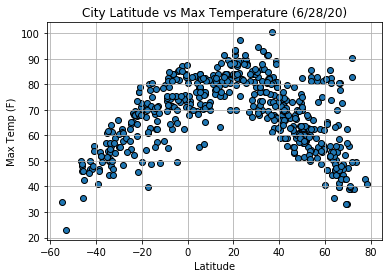

In [11]:
#plot scatter of max_temp vs latitude
x_lat = clean_city_data["Latitude"]
y_lat_temp = clean_city_data["Max_Temp"]
plt.scatter(x_lat,y_lat_temp,edgecolors = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude vs Max Temperature (6/28/20)")
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

Latitude versus max temperature plot:
The code analyzes the span of latitudes and what the maximum temperatures are for each location. As can be seen, the range of locations is between -60 degress latitude and +80 degrees latitude. As you get closer to 0 degrees latitude (the Equator), temperatures increase, as expected.

## Latitude vs. Humidity Plot

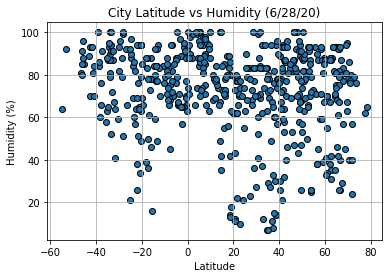

In [13]:
y_lat_hum = clean_city_data["Humidity"]
plt.scatter(x_lat,y_lat_hum,edgecolors = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (6/28/20)")
plt.savefig("output_data/Humidity_vs_Latitude.png")

Latitude versus humidity plot: 
The code analyzes the span of latitudes and what the humidity is for each location.  As can be seen here, there does not seem to be much of a correlation between latitude and humidity. During this timeframe, the humidity appears to be high (around 80%) for many cities, regardless of latitudes. Notably, more northern hemisphere cities (above 0 degrees latitude) see humidities in lower ranges (below 50%) versus southern hemisphere cities.

## Latitude vs. Cloudiness Plot

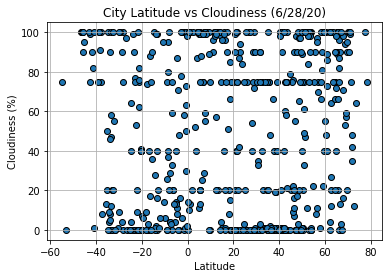

In [15]:
y_lat_cloud = clean_city_data["Cloudiness"]
plt.scatter(x_lat,y_lat_cloud,edgecolors = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (6/28/20)")
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

Latitude versus cloudiness plot: 
The code analyzes the span of latitudes and what the cloudiness percentage is for each location. Here it can be seen that there is a bulk of cities (both below and above the equator) that have 100% or 0% cloudiness. However there does not seem to be a realtionship between latitude and cloudiness percentage.

## Latitude vs. Wind Speed Plot

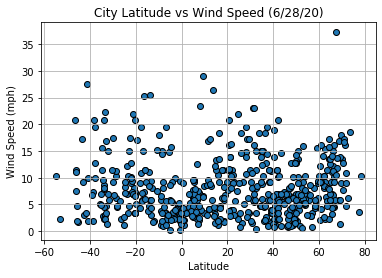

In [17]:
y_lat_wind = clean_city_data["Wind_Speed"]
plt.scatter(x_lat,y_lat_wind,edgecolors = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (6/28/20)")
plt.savefig("output_data/Wind_Speed_vs_Latitude.png")

Latitude versus wind speed plot: 
The code analyzes the span of latitudes and what the wind speed is for each location. Again, there does not appear to be a correlation between latitude and wind speed. There does seem to be a few outliers in the northern hemisphere data, but there are also more data points for the northern hemisphere. The bulk of the data seems to point to wind speeds of approximately 0-10mph regardless of hemisphere.

## Linear Regression

In [52]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregress_func(x,y):
    r = sts.pearsonr(x,y)
    #perform linear regression
    slope, intercept, rvalue, pvalue, stderr= linregress(x,y) 
   
    #set equation needed to get regression values using y = mx +b
    regress_values = x*slope + intercept

    #get equation of a line for printing on graph
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #plot scatter chart
    plt.scatter(x,y)
    
    #plot regression values on the same chart
    plt.plot(x,regress_values, "-r",label = line_eq)
    #add equation of line describing data set
    plt.legend(loc = 'best')

    #print line equation and r-squared value
    print(f"The r-squared is {round((r[0])**2,2)}.")
    print(f"The equation of the regression line is {line_eq}.")
    

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = clean_city_data.loc[clean_city_data.Latitude >0,:]
southern_hem = clean_city_data.loc[clean_city_data.Latitude <0,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.44.
The equation of the regression line is y = -0.46x + 87.36.


Text(0.5, 1.0, 'Northern Hemisphere - Max Temp vs Latitude')

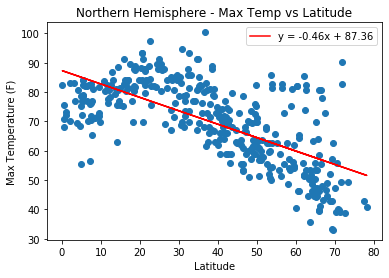

In [53]:
x_nh_lat = northern_hem["Latitude"]
y_nh_temp = northern_hem["Max_Temp"]
linregress_func(x_nh_lat,y_nh_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs Latitude")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.63.
The equation of the regression line is y = 0.74x + 79.44.


Text(0.5, 1.0, 'Southern Hemisphere - Max Temp vs Latitude')

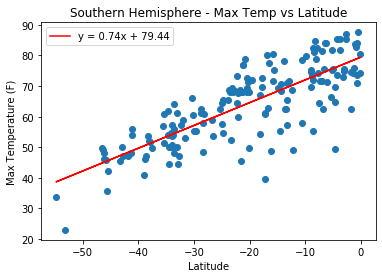

In [54]:
x_sh_lat = southern_hem['Latitude']
y_sh_temp = southern_hem['Max_Temp']
linregress_func(x_sh_lat,y_sh_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs Latitude")


Northern Hemisphere vs Sourthern Hemisphere: Max temp vs Latitude.
The Northern Hemisphere appears to show a moderate negative correlation between latitude and temp, while the Southern Hemisphere shows the opposite. This makes sense because, as you get further away from the equator, temperatures on the Earth decrease. Therefore these relationships for the 2 hemispheres make sense.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.01.
The equation of the regression line is y = -0.11x + 74.82.


Text(0.5, 1.0, 'Northern Hemisphere - Humidity vs Latitude')

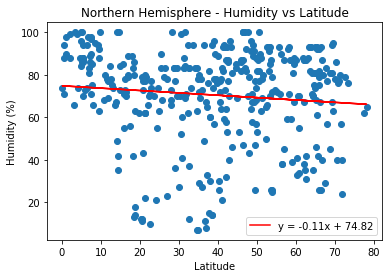

In [55]:
x_nh_lat = northern_hem['Latitude']
y_nh_humidity = northern_hem['Humidity']
linregress_func(x_nh_lat,y_nh_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs Latitude")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.01.
The equation of the regression line is y = -0.13x + 74.02.


Text(0.5, 1.0, 'Southern Hemisphere - Humidity vs Latitude')

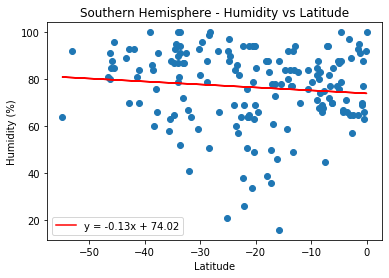

In [56]:
x_val_sh_lat = southern_hem["Latitude"]
y_val_sh_humidity = southern_hem["Humidity"]
linregress_func(x_val_sh_lat,y_val_sh_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs Latitude")


Northern Hemisphere vs Sourthern Hemisphere: Humidity vs Latitude. Both the Northern and Southern Hemispheres show a weak correlation to humidity, looking at the R-squared values (0.01 for both). This can be seen by the regression lines for both plots being almost horizontal. This means that latitude does not play a significant role in humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0.
The equation of the regression line is y = 0.04x + 49.48.


Text(0.5, 1.0, 'Northern Hemisphere - Cloudiness vs Latitude')

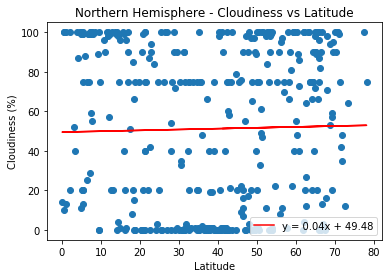

In [57]:
x_val_nh_lat = northern_hem["Latitude"]
y_val_nh_cloud = northern_hem["Cloudiness"]
linregress_func(x_val_nh_lat,y_val_nh_cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs Latitude")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.05.
The equation of the regression line is y = -0.68x + 28.22.


Text(0.5, 1.0, 'Southern Hemisphere - Cloudiness vs Latitude')

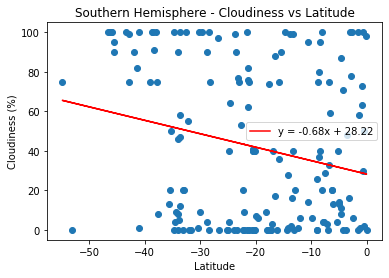

In [58]:
x_val_sh_lat = southern_hem["Latitude"]
y_val_sh_cloud = southern_hem["Cloudiness"]
linregress_func(x_val_sh_lat,y_val_sh_cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs Latitude")


Northern Hemisphere vs Sourthern Hemisphere: Cloudiness vs Latitude. The Northern Hemisphere and Southern Hemisphere show very little correlation to cloudiness. Looking at the Southern Hemisphere plot, it appears there is very little data below -45 degrees latitude - this may be due to the fact there is much less land mass below -45 degrees latitude than in the Northern Hemisphere above 45 degrees. Based on this, conclusions must be drawn on less data and any outliers can have an impact on the regression line drawn to this data (has a higher slope than the Northern Hemisphere). However, very little data falls on the regression line for either hemisphere, indicating a weak correlation).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.01.
The equation of the regression line is y = 0.02x + 6.97.


Text(0.5, 1.0, 'Northern Hemisphere - Wind Speed vs Latitude')

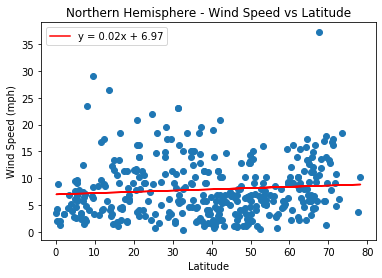

In [59]:
x_val_nh_lat = northern_hem["Latitude"]
y_val_nh_wind = northern_hem["Wind_Speed"]
linregress_func(x_val_nh_lat,y_val_nh_wind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs Latitude")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.05.
The equation of the regression line is y = -0.09x + 5.89.


Text(0.5, 1.0, 'Southern Hemisphere - Wind Speed vs Latitude')

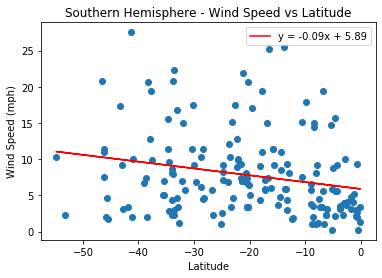

In [51]:
x_val_sh_lat = southern_hem["Latitude"]
y_val_sh_wind = southern_hem["Wind_Speed"]
linregress_func(x_val_sh_lat,y_val_sh_wind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs Latitude")

Northern Hemisphere vs Sourthern Hemisphere: Wind Speed vs Latitude. Both the Northern and Southern Hemispheres show very little correlation to wind speed - both have low R-squared values, indicating a very weak correlation. Again, it can be seen there is less Southern Hemisphere data than Northern Hemisphere data.